# Wine Quality Prediction

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [113]:
import warnings
warnings.filterwarnings('ignore')

In [114]:
data_filepath = "C:\\Users\\Shree123\\MACHINE LEARNING PROJECT TYCS\\Datasets\\winequalityN.csv"

In [115]:
wine_data = pd.read_csv(data_filepath)
wine_data.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [116]:
wine_data.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [117]:
# descriptive stats
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


<AxesSubplot:title={'center':'null values in the wine quality dataset'}, xlabel='Features'>

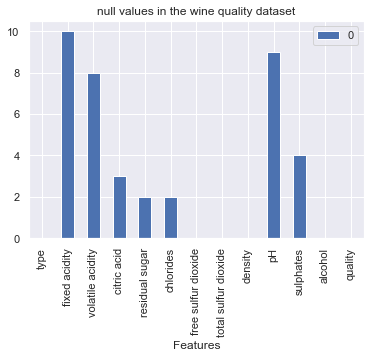

In [118]:
#  NUll values in the dataset
sns.set()
null_values  = pd.DataFrame(wine_data.isnull().sum())
null_values.plot(kind = 'bar' , xlabel = 'Features' , title = 'null values in the wine quality dataset')

In [119]:
#  Replacing null values by mean
for col in wine_data.columns:
    if wine_data[col].isna().sum() > 0:
        wine_data[col] = wine_data[col].fillna(wine_data[col].mean())

In [120]:
wine_data.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

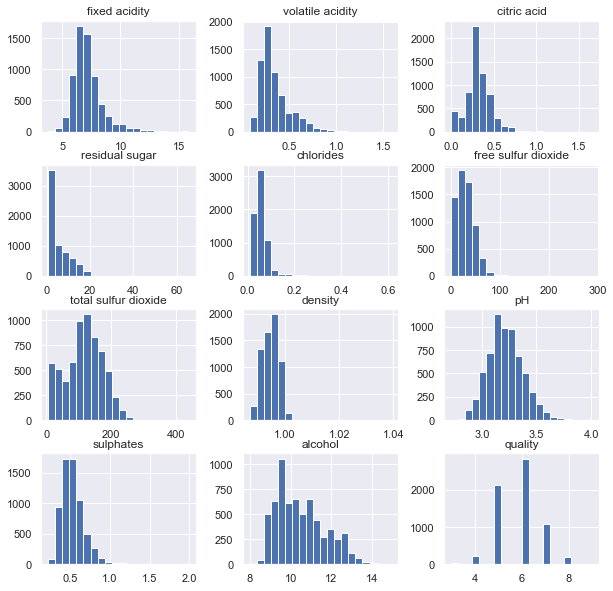

In [121]:
#  Data Visualization
wine_data.hist(bins = 20 , figsize = (10,10))
plt.show()

<Figure size 1200x1000 with 0 Axes>

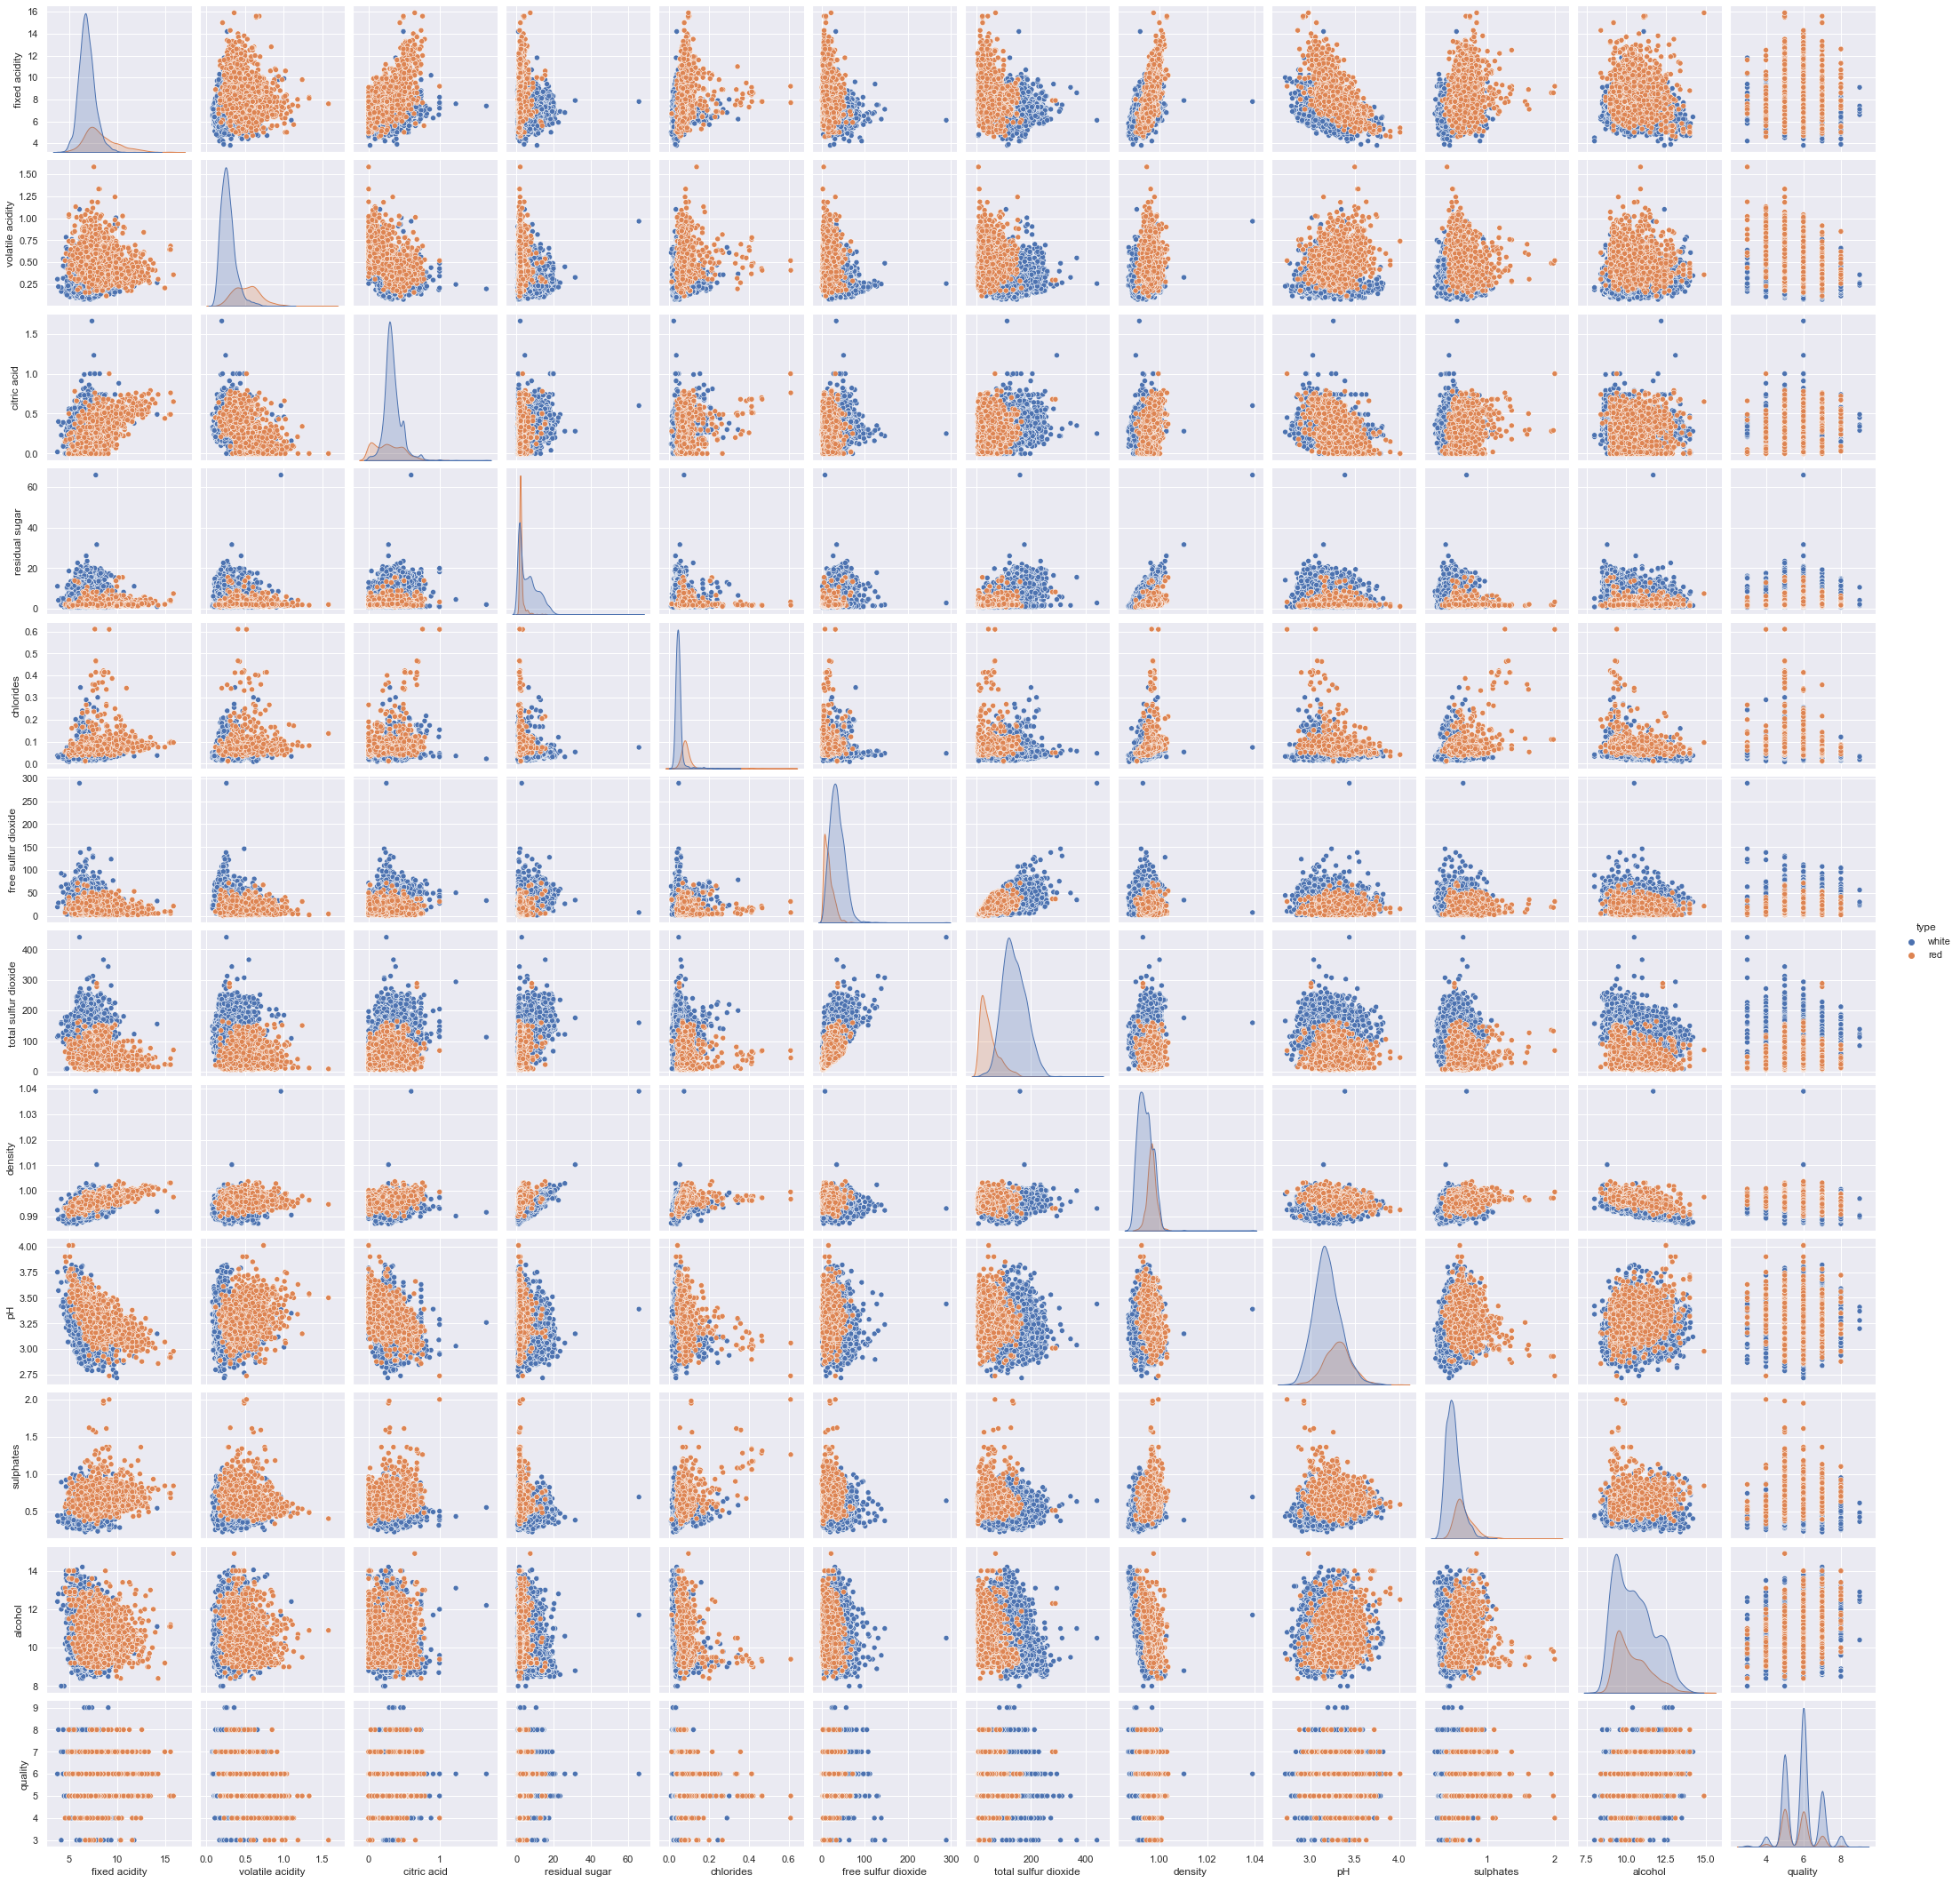

In [122]:
plt.figure(dpi = 100 , figsize  = (12,10))
sns.pairplot(wine_data , hue = 'type')
plt.show()

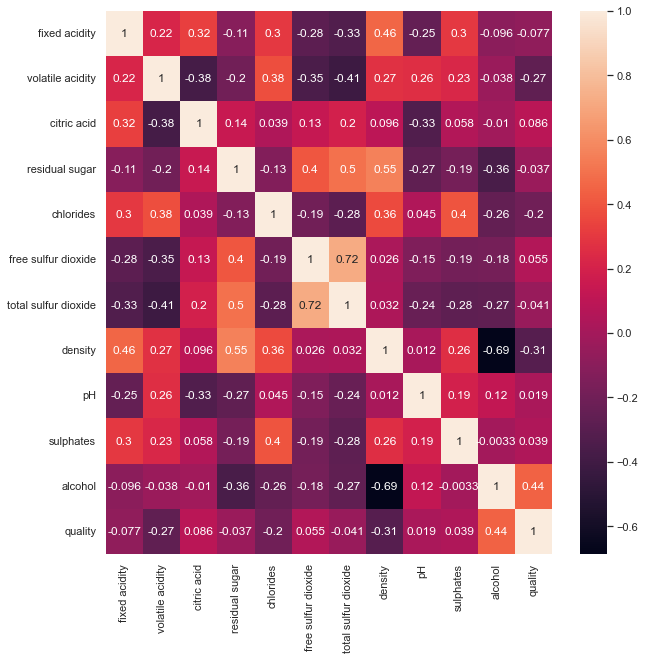

In [123]:
#  heatmap
plt.figure(figsize = (10,10))
sns.heatmap(wine_data.corr() , annot = True)
plt.show()

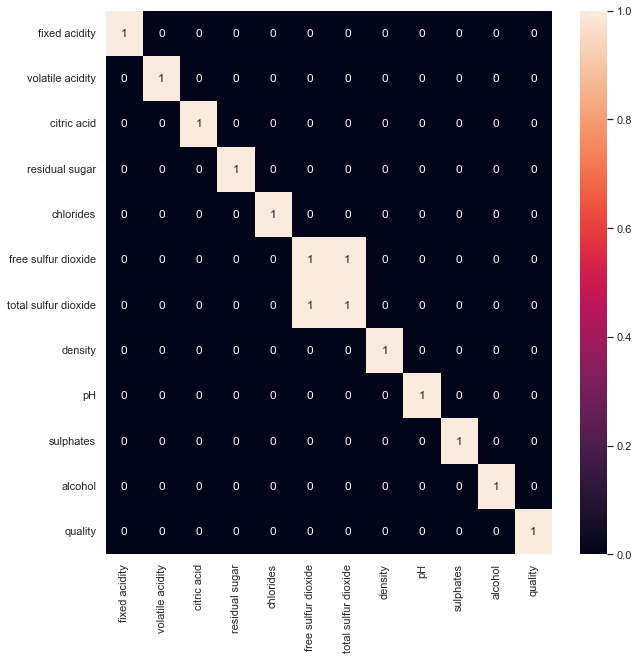

In [124]:
#  heatmap
plt.figure(figsize = (10,10))
sns.heatmap(wine_data.corr() > 0.7, annot = True)
plt.show()

In [125]:
# There is a high correlation between 'free sulfur dioxide' &  'total sulfur dioxide' 
#  So we have to remove them as they are not contributing to the model's performance

In [126]:
df = wine_data.drop(columns = 'total sulfur dioxide' , axis  = 1)

In [127]:
df['type'] = df['type'].map({'white':0 , 'red':1})

In [128]:
df['type'].unique()

array([0, 1], dtype=int64)

In [129]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [130]:
#  Making the response variable binary for classification

In [131]:
df['best_quality'] = [1 if x > 5 else 0 for x in df.quality]

In [132]:
df['best_quality'].unique()

array([1, 0], dtype=int64)

In [133]:
y = df['best_quality']

In [134]:
X = df.drop(columns = ['quality','best_quality'] , axis = 1)

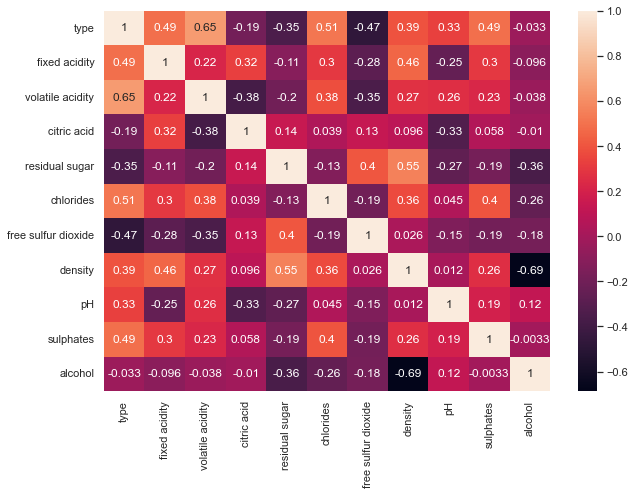

In [135]:
plt.figure(figsize = (10,7))
sns.heatmap(X.corr() , annot = True)
plt.show()

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X_train , X_test , y_train , y_test = train_test_split(X,y , random_state = 1 , train_size = 0.8 , test_size = 0.2)

In [138]:
X_train.shape

(5197, 11)

In [139]:
X_test.shape

(1300, 11)

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [141]:
from sklearn import metrics

In [142]:
#  Normalising - MinMax Scaler
norm = MinMaxScaler()
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)

# random forest classifier

In [154]:
model1 = RandomForestClassifier(random_state  = 40)

In [155]:
from sklearn.metrics import roc_auc_score

In [156]:
model1.fit(X_train,y_train)

RandomForestClassifier(random_state=40)

In [157]:
train_pred = model1.predict(X_train) # Training Set
test_pred = model1.predict(X_test) # Validation Set

In [158]:
print('Random Forest Classifier')
print('Accuracy Score :',roc_auc_score(y_train , train_pred))
print('Validation Score :',roc_auc_score(y_test , test_pred))

Random Forest Classifier
Accuracy Score : 1.0
Validation Score : 0.8080583144802118


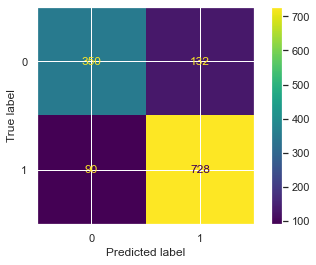

In [169]:
#  Confusion matrix drawn on the validation data
metrics.plot_confusion_matrix(model1 , X_test , y_test)
plt.show()

In [171]:
from sklearn.metrics import classification_report

In [172]:
print(classification_report(y_test , test_pred))

              precision    recall  f1-score   support

           0       0.71      0.55      0.62       482
           1       0.76      0.87      0.81       818

    accuracy                           0.75      1300
   macro avg       0.74      0.71      0.72      1300
weighted avg       0.75      0.75      0.74      1300



# Logistic regression

In [159]:
model2 = LogisticRegression()

In [160]:
model2.fit(X_train , y_train)

LogisticRegression()

In [161]:
train_pred = model2.predict(X_train) # Training Set
test_pred = model2.predict(X_test) # Validation Set

In [162]:
print('Logistic Regression')
print('Accuracy Score :',roc_auc_score(y_train , train_pred))
print('Validation Score :',roc_auc_score(y_test , test_pred))

Logistic Regression
Accuracy Score : 0.7001719298749499
Validation Score : 0.7080294007243657


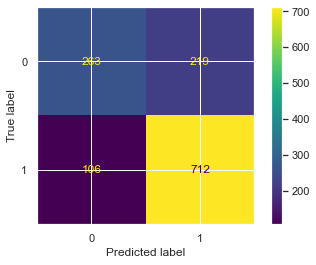

In [170]:
#  Confusion matrix drawn on the validation data
metrics.plot_confusion_matrix(model2 , X_test , y_test)
plt.show()

In [174]:
print(classification_report(y_test , test_pred))

              precision    recall  f1-score   support

           0       0.71      0.55      0.62       482
           1       0.76      0.87      0.81       818

    accuracy                           0.75      1300
   macro avg       0.74      0.71      0.72      1300
weighted avg       0.75      0.75      0.74      1300



#  XGboost

In [176]:
model3 = XGBClassifier(random_state = 40)

In [177]:
model3.fit(X_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=40, ...)

In [178]:
train_pred = model3.predict(X_train) # Training Set
test_pred = model3.predict(X_test) # Validation Set

In [179]:
print('Logistic Regression')
print('Accuracy Score :',roc_auc_score(y_train , train_pred))
print('Validation Score :',roc_auc_score(y_test , test_pred))

Logistic Regression
Accuracy Score : 0.9781979355649911
Validation Score : 0.803224137406284


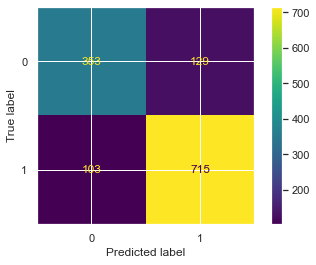

In [180]:
#  Confusion matrix drawn on the validation data
metrics.plot_confusion_matrix(model3 , X_test , y_test)
plt.show()

In [181]:
print(classification_report(y_test , test_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       482
           1       0.85      0.87      0.86       818

    accuracy                           0.82      1300
   macro avg       0.81      0.80      0.81      1300
weighted avg       0.82      0.82      0.82      1300

